### What I need to do is:
- Make a list of republican handles and democrat handles from reptweets.csv
- Use the lists to split df_word_count into a seperate word count dataframe for each party
- Make visualisations based on each dataframe

In [1]:
import pandas as pd

In [2]:
acct_file = "data/reptweets.csv"
word_count_filename = "data/word_count.csv"
df_politicians = pd.read_csv(acct_file)
# csv file has trailing spaces on some column names, this insures there are no leading or trailing spaces
df_politicians.columns = df_politicians.columns.str.strip()
df_word_count = pd.read_csv(word_count_filename, low_memory=False)
# combines the two dataframes joining on the common handle column
df_party_word_count = pd.merge(df_politicians, df_word_count, how='inner', on='handle')
# get republicans
df_reps = df_party_word_count[df_party_word_count.party == 'R']
df_dems = df_party_word_count[df_party_word_count.party == 'D']
# get independants but only return the columns Word and Count
df_dem_words = df_party_word_count[df_party_word_count.party == 'D'][['Word', 'Count']]
df_rep_words = df_party_word_count[df_party_word_count.party == 'R'][['Word', 'Count']]

In [3]:
df_dem_sorted = df_dem_words.groupby(['Word']).sum().sort_values(by=["Count"], ascending = False)

In [4]:
df_dem_sorted.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/democrat_word_counts.csv')

In [5]:
df_rep_sorted = df_rep_words.groupby(['Word']).sum().sort_values(by=["Count"], ascending = False)

In [6]:
df_rep_sorted.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/republican_word_counts.csv')

In [7]:
df_democrats = pd.read_csv('democrat_word_counts.csv')

In [8]:
df_democrats

,Word,Count
0,today,106447
1,work,96303
2,more,90738
3,act,77729
4,need,76149
...,...,...
768,buildup,3
769,liberation,3
770,resources,3
771,hr,3


In [9]:
df_dems_top_50 = df_democrats.head(50)

In [10]:
dems_top_words = [x for x in df_dems_top_50['Word']]

In [11]:
df_republicans = pd.read_csv('republican_word_counts.csv')

In [12]:
df_reps_top_50 = df_republicans.head(50)

In [13]:
reps_top_words = [x for x in df_reps_top_50['Word']]

In [14]:
from plotnine import *

In [15]:
g_democrats = (
    ggplot(df_dems_top_50, aes(x="Word",y="Count")) + geom_col() + coord_flip() + theme(figure_size=[9,8])
)

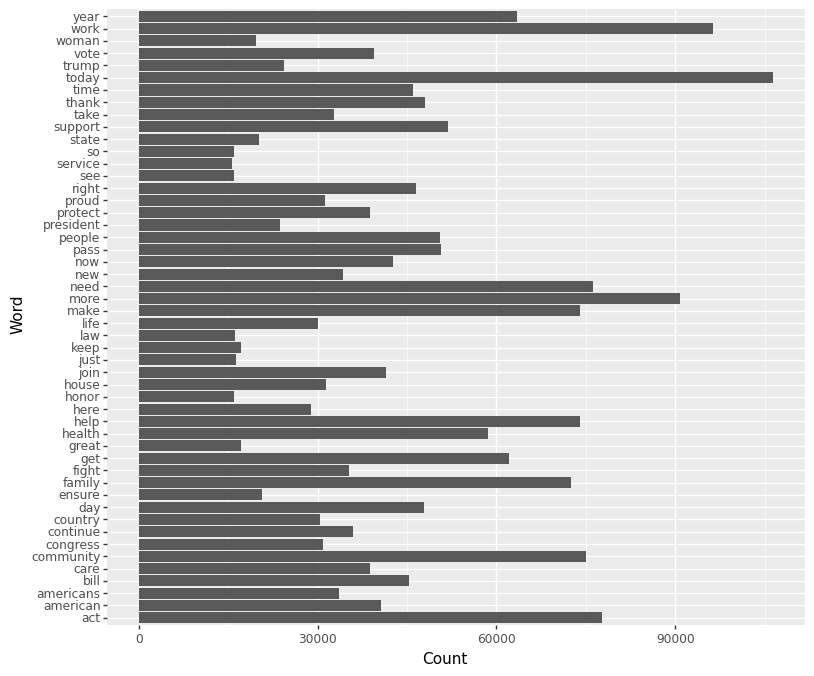

<ggplot: (122709311431)>

In [16]:
g_democrats

In [17]:
g_republicans = (
    ggplot(df_reps_top_50, aes(x="Word",y="Count")) + geom_col() + coord_flip() + theme(figure_size=[9,8])
)

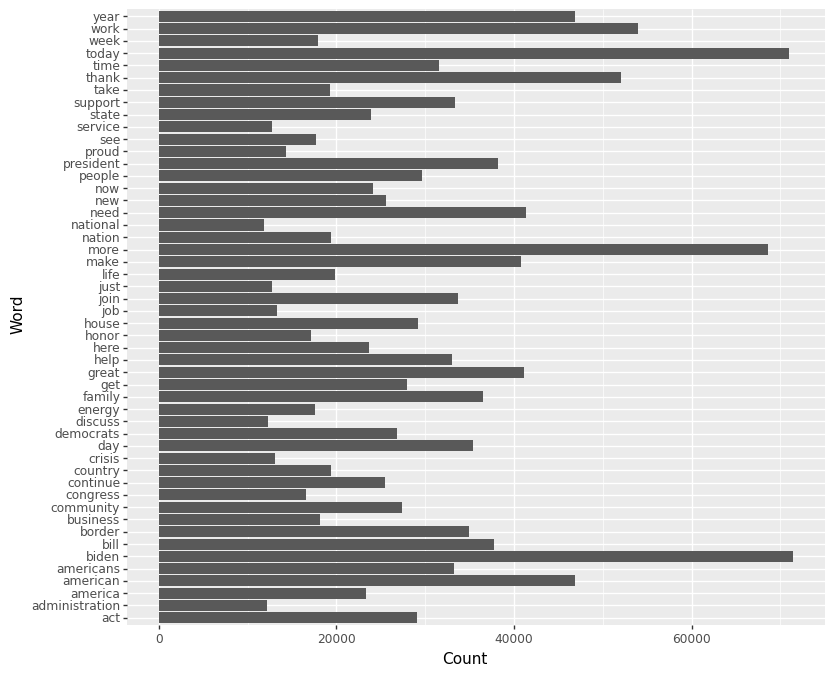

<ggplot: (122709299899)>

In [18]:
g_republicans

In [19]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

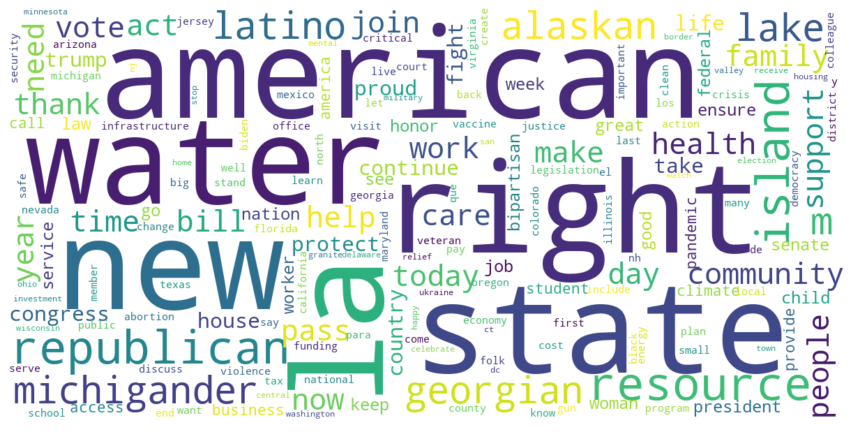

<Figure size 432x288 with 0 Axes>

In [20]:
dtext = " ".join(i for i in df_democrats.Word)
dwordcloud = WordCloud(background_color="white", scale=3).generate(dtext)
plt.figure( figsize=(15,10))
plt.imshow(dwordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('democrats_word_cloud.png')

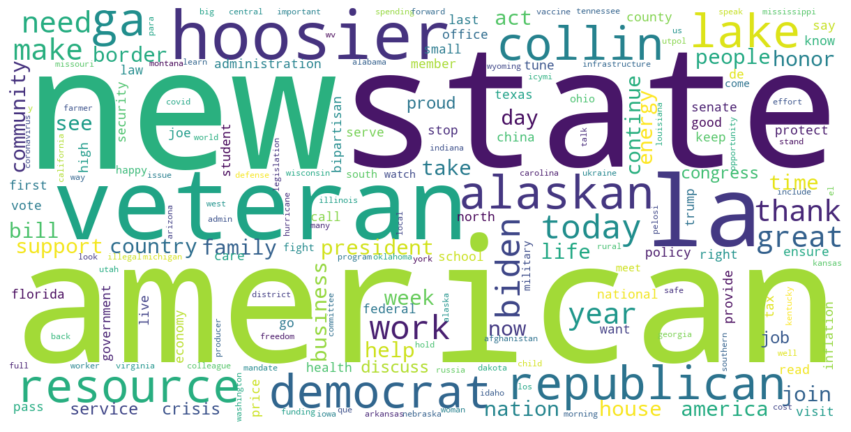

<Figure size 432x288 with 0 Axes>

In [21]:
rtext = " ".join(i for i in df_republicans.Word)
rwordcloud = WordCloud(background_color="white", scale=3).generate(rtext)
plt.figure( figsize=(15,10))
plt.imshow(rwordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('republicans_word_cloud.png')

In [22]:
df_politicians.head()

,name,handle,state,party,branch
0,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate
1,"Barrasso, John",SenJohnBarrasso,WY,R,Senate
2,"Bennet, Michael F.",SenatorBennet,CO,D,Senate
3,"Blackburn, Marsha",MarshaBlackburn,TN,R,Senate
4,"Blumenthal, Richard",SenBlumenthal,CT,D,Senate


In [23]:
df_word_count.head()

,handle,Word,Count
0,AustinScottGA08,today,496
1,AustinScottGA08,thank,361
2,AustinScottGA08,georgia,292
3,AustinScottGA08,day,276
4,AustinScottGA08,more,274


In [24]:
df_party_word_count.head()

,name,handle,state,party,branch,Word,Count
0,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,wisconsin,934
1,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,work,846
2,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,support,618
3,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,need,532
4,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,health,482


In [25]:
with_dates = pd.read_csv('all_tweets.csv')

In [26]:
with_dates.tail()

,handle,name,tweet_id,author_id,lang,replied_to,created_at,tweet_text,possibly_sensitive,conversation_id,key_word_list
25,RepPeteAguilar,Rep. Pete Aguilar,1599432082735779840,3018670151,en,1599432082735779840,2022-12-04T15:54:59.000Z,RT @FaceTheNation: For the first time in more ...,False,1599432082735779840,"['rt', 'first', 'time', 'more', 'decade', 'hou..."
26,RepPeteAguilar,Rep. Pete Aguilar,1598776424617242624,3018670151,en,1598776424617242624,2022-12-02T20:29:38.000Z,My statement with @RepJeffries and @RepKClark ...,False,1598776424617242624,"['statement', 'condemn', 'antisemitism']"
27,RepPeteAguilar,Rep. Pete Aguilar,1598769566229766145,3018670151,en,1598769566229766145,2022-12-02T20:02:22.000Z,Today we mark the 7th anniversary of the deadl...,False,1598769566229766145,"['today', 'mark', 'anniversary', 'deadly', 'te..."
28,RepPeteAguilar,Rep. Pete Aguilar,1598357144159617026,3018670151,en,1598357144159617026,2022-12-01T16:43:33.000Z,"My statement on the election of @RepJoeNeguse,...",False,1598357144159617026,"['statement', 'election', 'chair', 'co', 'chai..."
29,RepPeteAguilar,Rep. Pete Aguilar,1598337669515419649,3018670151,en,1598337669515419649,2022-12-01T15:26:10.000Z,My statement on the election of @WhipClyburn a...,False,1598337669515419649,"['statement', 'election', 'assistant', 'democr..."


In [27]:
df_reps.head()

,name,handle,state,party,branch,Word,Count
50,"Barrasso, John",SenJohnBarrasso,WY,R,Senate,american,557
51,"Barrasso, John",SenJohnBarrasso,WY,R,Senate,energy,554
52,"Barrasso, John",SenJohnBarrasso,WY,R,Senate,wyoming,553
53,"Barrasso, John",SenJohnBarrasso,WY,R,Senate,biden,499
54,"Barrasso, John",SenJohnBarrasso,WY,R,Senate,today,451


In [28]:
republican_handles = []
for x in df_reps['handle']:
    if x not in republican_handles:
        republican_handles.append(x)

In [29]:
len(republican_handles)

264

In [30]:
df_dems.head()

,name,handle,state,party,branch,Word,Count
0,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,wisconsin,934
1,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,work,846
2,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,support,618
3,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,need,532
4,"Baldwin, Tammy",SenatorBaldwin,WI,D,Senate,health,482


In [31]:
democrat_handles = []
for x in df_dems['handle']:
    if x not in democrat_handles:
        democrat_handles.append(x)

In [32]:
len(democrat_handles)

268

In [34]:
tweets = pd.read_csv("data/tweets.csv")
dates_tweets = tweets.drop(labels='name', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='tweet_id', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='author_id', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='lang', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='replied_to', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='possibly_sensitive', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise').drop(labels='conversation_id', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise')

C:\Users\Amara\AppData\Local\Temp\ipykernel_27016\1132877888.py:1: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.


In [35]:
dates_tweets.head()

,handle,created_at,tweet_text,retweet_count,reply_count,like_count,quote_count,key_word_list
0,SenatorBaldwin,2022-12-09T18:56:26.000Z,Reminder: You have until January 15th to #GetC...,9.0,2.0,2.0,1.0,"['reminder', 'january', 'getcovered', 'quality..."
1,SenatorBaldwin,2022-12-08T22:16:10.000Z,Read more about our work to restore these pens...,9.0,4.0,4.0,1.0,"['read', 'more', 'work', 'restore', 'pension',..."
2,SenatorBaldwin,2022-12-08T22:16:09.000Z,"A pension is a promise, and today we ensured t...",25.0,15.0,15.0,4.0,"['pension', 'promise', 'today', 'ensure', 'pro..."
3,SenatorBaldwin,2022-12-08T19:38:46.000Z,"On Latina Equal Pay Day, we bring attention to...",13.0,8.0,8.0,1.0,"['latina', 'equal', 'pay', 'day', 'bring', 'at..."
4,SenatorBaldwin,2022-12-08T18:57:09.000Z,RT @RepStricklandWA: Access to safe &amp; lega...,17.0,0.0,0.0,0.0,"['access', 'safe', 'legal', 'reproductive', 'h..."


In [37]:
democrat_tweets = []
for i in range(len(dates_tweets)):
    if dates_tweets.iloc[i]['handle'] in democrat_handles:
        democrat_tweets.append(dates_tweets.iloc[i])

In [38]:
df_democrat_tweets = pd.DataFrame(democrat_tweets)

In [57]:
df_democrat_tweets.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/democrat_tweets.csv')

In [59]:
df_dem_tweets = pd.read_csv('data/democrat_tweets.csv')

In [60]:
df_dem_tweets.head()

,Unnamed: 0,handle,created_at,tweet_text,retweet_count,reply_count,like_count,quote_count,key_word_list
0,0,SenatorBaldwin,2022-12-09T18:56:26.000Z,Reminder: You have until January 15th to #GetC...,9.0,2.0,2.0,1.0,"['reminder', 'january', 'getcovered', 'quality..."
1,1,SenatorBaldwin,2022-12-08T22:16:10.000Z,Read more about our work to restore these pens...,9.0,4.0,4.0,1.0,"['read', 'more', 'work', 'restore', 'pension',..."
2,2,SenatorBaldwin,2022-12-08T22:16:09.000Z,"A pension is a promise, and today we ensured t...",25.0,15.0,15.0,4.0,"['pension', 'promise', 'today', 'ensure', 'pro..."
3,3,SenatorBaldwin,2022-12-08T19:38:46.000Z,"On Latina Equal Pay Day, we bring attention to...",13.0,8.0,8.0,1.0,"['latina', 'equal', 'pay', 'day', 'bring', 'at..."
4,4,SenatorBaldwin,2022-12-08T18:57:09.000Z,RT @RepStricklandWA: Access to safe &amp; lega...,17.0,0.0,0.0,0.0,"['access', 'safe', 'legal', 'reproductive', 'h..."


In [40]:
republican_tweets = []
for i in range(len(dates_tweets)):
    if dates_tweets.iloc[i]['handle'] in republican_handles:
        republican_tweets.append(dates_tweets.iloc[i])

In [41]:
df_republican_tweets = pd.DataFrame(republican_tweets)

In [50]:
df_republican_tweets.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/republican_tweets.csv')

In [43]:
df_rep_tweets = pd.read_csv('republican_tweets.csv')

In [44]:
df_rep_tweets.head()

,Unnamed: 0,handle,created_at,tweet_text,retweet_count,reply_count,like_count,quote_count,key_word_list
0,3249,SenJohnBarrasso,2022-12-09T20:17:10.000Z,Senator Lummis is a champion for western issue...,1.0,1.0,1.0,0.0,"['senator', 'lummis', 'champion', 'western', '..."
1,3250,SenJohnBarrasso,2022-12-09T19:16:37.000Z,Christmas is in full swing in downtown Torring...,2.0,5.0,5.0,0.0,"['christmas', 'full', 'swing', 'downtown', 'to..."
2,3251,SenJohnBarrasso,2022-12-09T15:57:44.000Z,RT @SenateGOP: https://t.co/lkLFJEZamb,46.0,0.0,0.0,0.0,[]
3,3252,SenJohnBarrasso,2022-12-09T15:41:03.000Z,Biden administration policies are causing anxi...,15.0,106.0,106.0,10.0,"['biden', 'administration', 'policy', 'cause',..."
4,3253,SenJohnBarrasso,2022-12-08T17:57:00.000Z,.@JoeBiden is swapping the “Merchant of Death”...,104.0,202.0,202.0,13.0,"['swap', 'merchant', 'death', 'leave', 'marine..."


In [45]:
reps_not_dems = []
for i in range(len(reps_top_words)):
    if reps_top_words[i] not in dems_top_words:
        reps_not_dems.append(reps_top_words[i])

In [46]:
reps_not_dems

['biden',
 'border',
 'democrats',
 'america',
 'nation',
 'business',
 'week',
 'energy',
 'job',
 'crisis',
 'discuss',
 'administration',
 'national']

In [47]:
dems_not_reps = []
for i in range(len(dems_top_words)):
    if dems_top_words[i] not in reps_top_words:
        dems_not_reps.append(dems_top_words[i])

In [48]:
dems_not_reps

['health',
 'pass',
 'right',
 'vote',
 'care',
 'protect',
 'fight',
 'trump',
 'ensure',
 'woman',
 'keep',
 'law',
 'so']

In [52]:
df_rep_tweets.iloc[0]['key_word_list']

"['senator', 'lummis', 'champion', 'western', 'issue', 'devote', 'defend', 'multiple', 'use', 'public', 'land', 'represent', 'wyoming', 'west', 'well', 'new', 'role', 'chairman', 'senate', 'western', 'caucus']"

In [77]:
border_dates = []
for i in range(len(df_rep_tweets)):
    if 'border' in df_rep_tweets.iloc[i]['key_word_list']:
        border_dates.append(df_rep_tweets.iloc[i]['created_at'][:10])

In [78]:
len(border_dates)

32961

In [79]:
counts = []
for i in range(len(border_dates)):
    counts.append(1)

In [80]:
border_df = pd.DataFrame(list(zip(border_dates, counts)),
               columns =['Date', 'Count'])

In [81]:
len(border_df)

32961

In [82]:
grouped_border_df = border_df.groupby(['Date']).sum()

In [83]:
grouped_border_df

,Count
Date,
2011-04-06,2
2011-04-07,2
2011-04-12,1
2011-06-02,1
2012-09-10,2
...,...
2022-12-17,2
2022-12-19,6
2022-12-20,7


<AxesSubplot:xlabel='Date'>

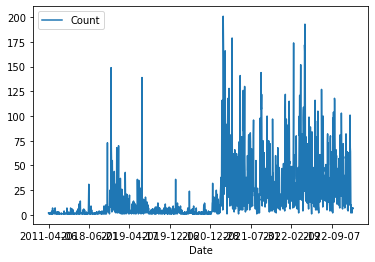

In [85]:
grouped_border_df.plot()

In [86]:
grouped_border_df.to_csv('C:/Users/Amara/Documents/GitHub/DS105-Project/data/grouped_border_df.csv')

In [88]:
df_grouped_border = pd.read_csv("data/grouped_border_df.csv")

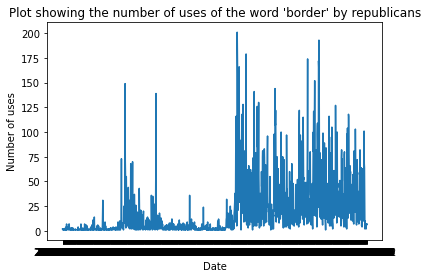

In [89]:
x_axis = [x for x in df_grouped_border['Date']]
y_axis = [x for x in df_grouped_border['Count']]

plt.plot(x_axis, y_axis)
plt.title('Plot showing the number of uses of the word \'border\' by republicans')
plt.xlabel('Date')
plt.ylabel('Number of uses')
plt.show()

C:\Users\Amara\AppData\Local\Temp\ipykernel_27016\3278086538.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.




<AxesSubplot:xlabel='Date'>

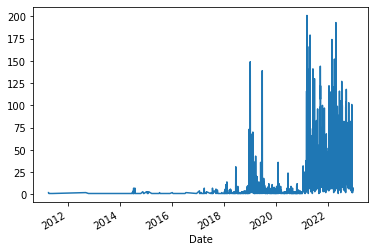

In [90]:
series = pd.read_csv("data/grouped_border_df.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()

In [91]:
df_grouped_border

,Date,Count
0,2011-04-06,2
1,2011-04-07,2
2,2011-04-12,1
3,2011-06-02,1
4,2012-09-10,2
...,...,...
1500,2022-12-17,2
1501,2022-12-19,6
1502,2022-12-20,7
1503,2022-12-21,6


In [93]:
border2022 = []
for i in range(len(df_grouped_border)):
    if '2022' in df_grouped_border.iloc[i]['Date']:
        border2022.append(df_grouped_border.iloc[i])

In [96]:
df_border2022 = pd.DataFrame(border2022)

In [99]:
df_border2022.head()

,Date,Count
1151,2022-01-01,13
1152,2022-01-02,10
1153,2022-01-03,36
1154,2022-01-04,47
1155,2022-01-05,44


<AxesSubplot:>

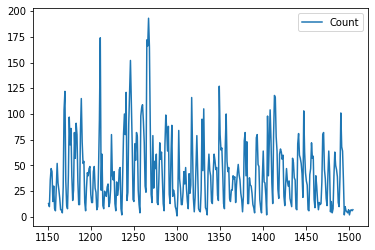

In [98]:
df_border2022.plot()

In [100]:
border2022_21 = []
for i in range(len(df_grouped_border)):
    if '2022' in df_grouped_border.iloc[i]['Date'] or '2021' in df_grouped_border.iloc[i]['Date']:
        border2022_21.append(df_grouped_border.iloc[i])

In [101]:
df_border_22_21 = pd.DataFrame(border2022_21)

<AxesSubplot:>

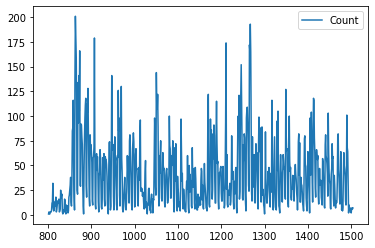

In [102]:
df_border_22_21.plot()

In [103]:
border2022_20 = []
for i in range(len(df_grouped_border)):
    if '2022' in df_grouped_border.iloc[i]['Date'] or '2021' in df_grouped_border.iloc[i]['Date'] or '2020' in df_grouped_border.iloc[i]['Date']:
        border2022_20.append(df_grouped_border.iloc[i])

In [104]:
df_border_22_20 = pd.DataFrame(border2022_20)

<AxesSubplot:>

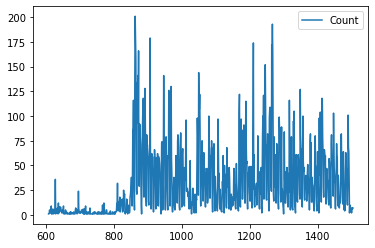

In [105]:
df_border_22_20.plot()

In [ ]:
just_reps = []
for i in range(len(df_republican_tweets)):
    for word in reps_not_dems:
        if word in df_republican_tweets[i]['tweet_text']:
            df_just_reps.append(df_republican_tweets[i])

In [ ]:
df_just_reps = pd.DataFrame(just_reps)

In [ ]:
x_axis = [x for x in df_grouped_border['Date']]
y_axis = [x for x in df_grouped_border['Count']]

plt.plot(x_axis, y_axis)
plt.title('Plot showing the number of uses of the word \'border\' by republicans')
plt.xlabel('Date')
plt.ylabel('Number of uses')
plt.show()

In [ ]:
df_grouped_border.plot()

In [ ]:
series = pd.read_csv("grouped_border_df.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()

In [ ]:
border_dates = []
for i in range(len(df_republican_dates_tweets)):
    if 'border' in df_republican_dates_tweets.iloc[i]['tweet_text']:
        border_dates.append(df_republican_dates_tweets.iloc[i]['created_at'])

In [ ]:
border_just_dates = []
for i in range(len(border_dates)):
    border_just_dates.append(border_dates[i][:10])

In [ ]:
counts = []
for i in range(len(border_dates)):
    counts.append(1)

In [ ]:
border_df = pd.DataFrame(list(zip(border_just_dates, counts)),
               columns =['Date', 'Count'])

In [ ]:
grouped_border_df = border_df.groupby(['Date']).sum()